<a href="https://colab.research.google.com/github/eoinleen/basic_plotting/blob/main/out_sc_plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 DATA ALREADY LOADED
Current file shape: 4000 rows × 10 columns

🔄 Do you want to upload a NEW file? (yes/no): no

✅ Using existing data



/tmp/ipython-input-2066456594.py:203: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(df[X_COLUMN], df[Y_COLUMN],


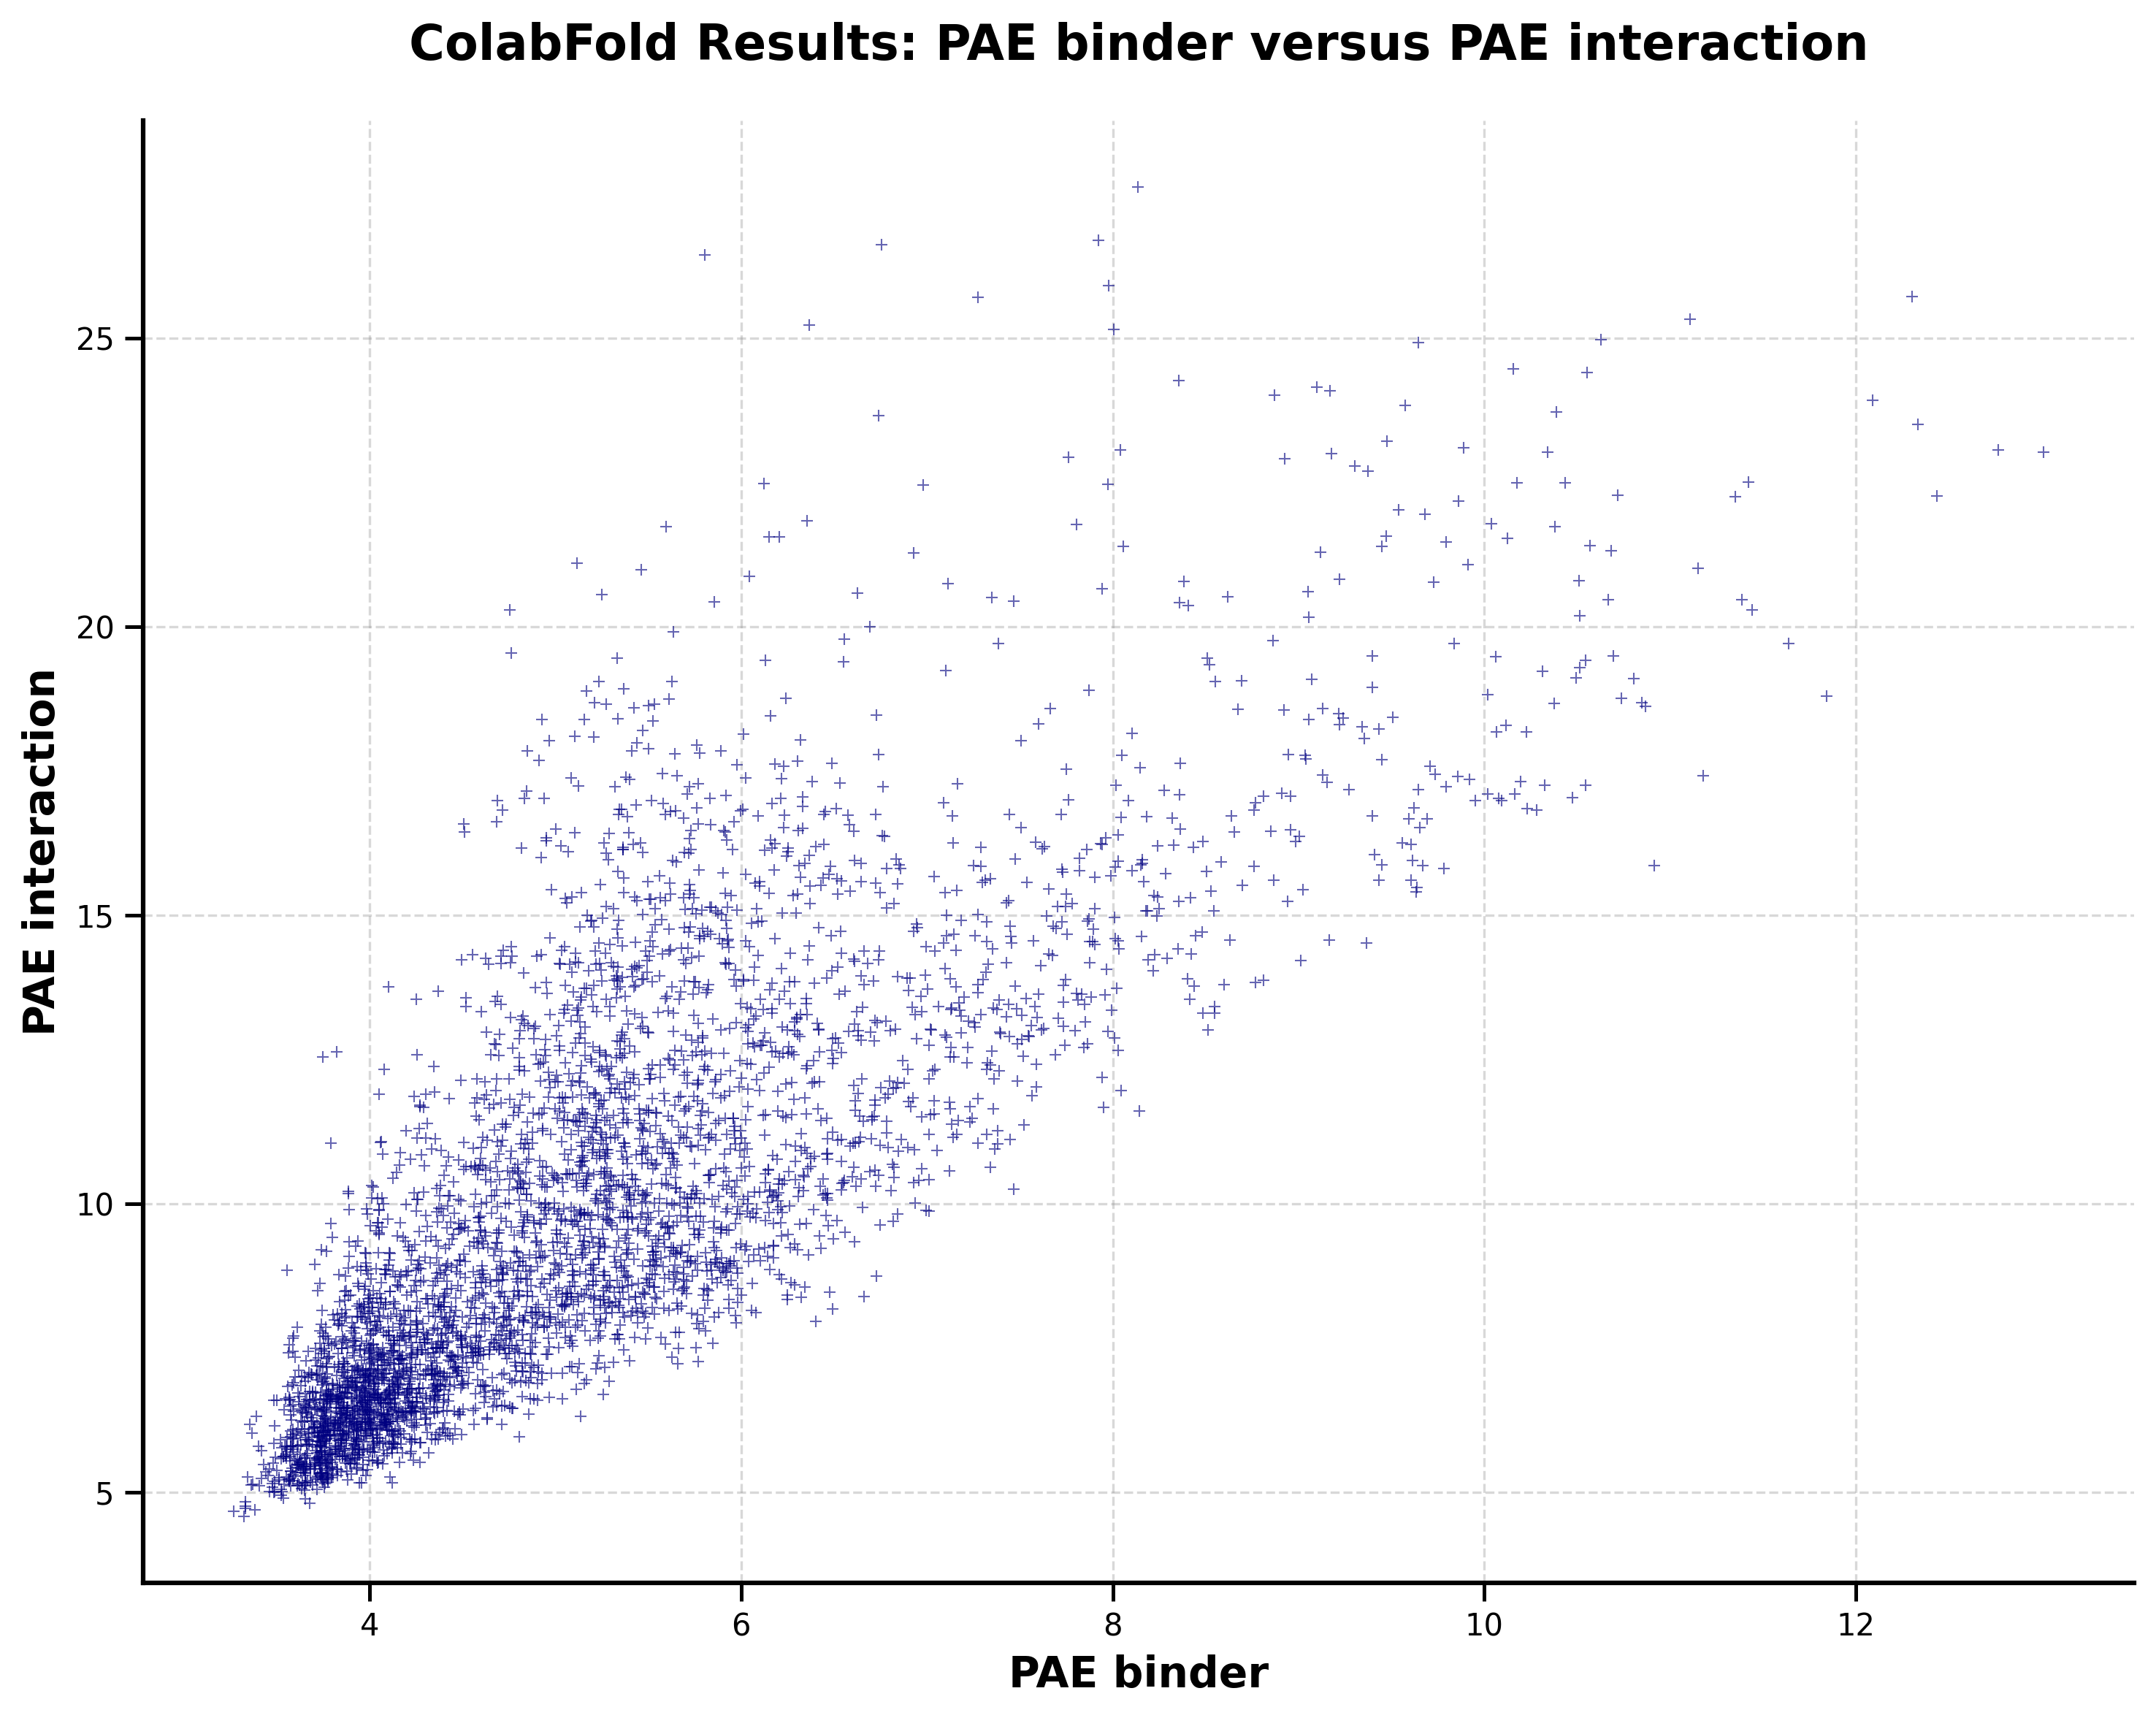


📊 PLOT STATISTICS
📈 pae_binder (PAE binder):
   Range: 3.269 to 13.011
   Mean: 5.231 ± 1.447

📈 pae_interaction (PAE interaction):
   Range: 4.585 to 27.617
   Mean: 10.146 ± 3.864

📊 Correlation: 0.795
📍 Number of points: 4000

💡 TO CREATE ANOTHER PLOT:
   1. Change X_COLUMN and/or Y_COLUMN in Step 2
   2. Customize aesthetics in the 🎨 Beauty Section (Step 3)
   3. Run this cell again (Ctrl+Enter or Cmd+Enter)

🔄 TO UPLOAD A NEW FILE:
   Just run the cell again - you'll be prompted!

📋 Available columns for plotting:
   • binder_aligned_rmsd
   • pae_binder
   • pae_interaction
   • pae_target
   • plddt_binder
   • plddt_target
   • plddt_total
   • target_aligned_rmsd
   • time
   • description

🎨 AESTHETIC QUICK TIPS:
🎯 MARKER STYLES: 'o' (circle), 's' (square), '^' (triangle up),
                 'v' (triangle down), 'D' (diamond), '*' (star),
                 'p' (pentagon), 'h' (hexagon), 'X' (X mark)

🌈 COLOR EXAMPLES:
   Named: 'red', 'blue', 'green', 'purple', 'orange', 'st

In [11]:
# Interactive Scatter Plot for Protein Design Data
# Upload your data file once, then create multiple plots by changing parameters

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ========================================
# STEP 1: UPLOAD YOUR DATA FILE
# ========================================

# Check if data is already loaded
if 'df' in globals():
    print("=" * 60)
    print("📊 DATA ALREADY LOADED")
    print("=" * 60)
    print(f"Current file shape: {df.shape[0]} rows × {df.shape[1]} columns")

    response = input("\n🔄 Do you want to upload a NEW file? (yes/no): ").strip().lower()

    if response in ['yes', 'y']:
        print("\n📁 Please upload your new data file...")
        del df  # Clear existing data
        upload_new_file = True
    else:
        print("\n✅ Using existing data")
        upload_new_file = False
else:
    upload_new_file = True

if upload_new_file:
    print("📁 UPLOAD YOUR DATA FILE")
    print("=" * 60)

    uploaded = files.upload()

    for filename, content in uploaded.items():
        print(f"✅ Uploaded: {filename}")

        # Read the file
        data_string = content.decode('utf-8')
        lines = data_string.strip().split('\n')

        # Find where data starts (skip SCORE: prefix lines)
        data_lines = []
        for line in lines:
            if line.strip().startswith('SCORE:'):
                # Remove 'SCORE:' prefix and add to data
                clean_line = line.replace('SCORE:', '').strip()
                data_lines.append(clean_line)

        # Parse into DataFrame
        from io import StringIO
        df = pd.read_csv(StringIO('\n'.join(data_lines)), sep=r'\s+')

        print(f"\n✅ Data loaded successfully!")
        print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")
        print(f"\n📋 Available columns:")
        for i, col in enumerate(df.columns):
            print(f"   {i}: {col}")
        print("\n" + "=" * 60)
        break

print("\n" + "=" * 60)

# ========================================
# STEP 2: CONFIGURE YOUR PLOT DATA
# ========================================

# SELECT COLUMNS TO PLOT (use column names from list above)
X_COLUMN = 'pae_binder'           # X-axis data column
Y_COLUMN = 'pae_interaction'      # Y-axis data column

# Axis labels (can be different from column names)
X_LABEL = "PAE binder"
Y_LABEL = "PAE interaction"
PLOT_TITLE = "ColabFold Results: PAE binder versus PAE interaction"

# ========================================
# STEP 3: 🎨 BEAUTY & AESTHETICS SECTION
# ========================================

# --- FIGURE SIZE & RESOLUTION ---
FIGURE_SIZE = (10, 8)             # Width, Height in inches
DPI = 300                         # Resolution (higher = sharper, try 150-300 for publications)
BACKGROUND_TRANSPARENT = True     # Transparent background (useful for presentations)

# --- FONT SETTINGS ---
FONT_SIZE = 12                    # Base font size
TITLE_FONT_SIZE = 16              # Title font size
LABEL_FONT_SIZE = 14              # Axis label font size
TICK_FONT_SIZE = 10               # Tick label font size
FONT_FAMILY = 'sans-serif'        # Font: 'serif', 'sans-serif', 'monospace'
TITLE_WEIGHT = 'bold'             # Title weight: 'normal', 'bold'
LABEL_WEIGHT = 'bold'             # Label weight: 'normal', 'bold'

# --- MARKER SETTINGS ---
MARKER_STYLE = '+'                # Options: 'o', 's', '^', 'v', '<', '>', 'D', 'p', '*', etc.
MARKER_SIZE = 16                   # Size of markers
MARKER_COLOR = 'navy'             # Color name or hex code (e.g., '#FF5733')
MARKER_ALPHA = 0.6                # Transparency (0.0 to 1.0)
MARKER_EDGE_COLOR = 'black'       # Edge color around markers
MARKER_EDGE_WIDTH = 0.5           # Edge thickness (0 for no edge)

# --- GRID SETTINGS ---
SHOW_GRID = True                  # Show/hide grid lines
GRID_ALPHA = 0.3                  # Grid transparency
GRID_COLOR = 'gray'               # Grid color
GRID_STYLE = '--'                 # Line style: '--', '-', '-.', ':'
MAJOR_GRID_LINEWIDTH = 0.8        # Major grid line width
MINOR_GRID_LINEWIDTH = 0.4        # Minor grid line width
SHOW_MINOR_GRID = True            # Show minor grid lines

# --- TICK SETTINGS ---
MAJOR_TICK_SPACING_X = None       # Set to None for automatic, or specify value (e.g., 0.1)
MINOR_TICK_SPACING_X = None       # Set to None for automatic, or specify value (e.g., 0.05)
MAJOR_TICK_SPACING_Y = None       # Set to None for automatic, or specify value (e.g., 0.1)
MINOR_TICK_SPACING_Y = None       # Set to None for automatic, or specify value (e.g., 0.05)
TICK_LENGTH = 6                   # Length of major tick marks
MINOR_TICK_LENGTH = 3             # Length of minor tick marks
TICK_WIDTH = 1.2                  # Thickness of tick marks

# --- AXIS STYLING ---
AXIS_LINE_WIDTH = 1.5             # Thickness of axis lines
SHOW_TOP_SPINE = False            # Show top border
SHOW_RIGHT_SPINE = False          # Show right border
SHOW_LEFT_SPINE = True            # Show left border
SHOW_BOTTOM_SPINE = True          # Show bottom border

# --- AXIS LIMITS (set to None for automatic) ---
X_MIN = None                      # Minimum X value
X_MAX = None                      # Maximum X value
Y_MIN = None                      # Minimum Y value
Y_MAX = None                      # Maximum Y value

# --- TEXT COLORS ---
TITLE_COLOR = 'black'             # Title color
LABEL_COLOR = 'black'             # Label color
TICK_COLOR = 'black'              # Tick label color

# --- BACKGROUND COLORS (ignored if BACKGROUND_TRANSPARENT = True) ---
PLOT_BACKGROUND = 'white'         # Background inside plot area
FIGURE_BACKGROUND = 'white'       # Background outside plot area

# --- ADVANCED: STYLE PRESETS (Uncomment one to apply) ---

# Preset 1: Publication Ready (Nature/Science style)
# FIGURE_BACKGROUND = PLOT_BACKGROUND = 'white'
# MARKER_COLOR = '#2E3440'; MARKER_SIZE = 40; MARKER_ALPHA = 0.8
# GRID_ALPHA = 0.2; GRID_STYLE = '-'; GRID_COLOR = '#D8DEE9'
# TITLE_FONT_SIZE = 16; LABEL_FONT_SIZE = 14; FONT_FAMILY = 'serif'
# BACKGROUND_TRANSPARENT = False

# Preset 2: Modern & Minimal
# FIGURE_BACKGROUND = PLOT_BACKGROUND = '#FAFAFA'
# MARKER_COLOR = '#5E548E'; MARKER_SIZE = 60; MARKER_ALPHA = 0.85
# MARKER_EDGE_COLOR = 'none'; GRID_ALPHA = 0.15
# SHOW_TOP_SPINE = SHOW_RIGHT_SPINE = False
# BACKGROUND_TRANSPARENT = False

# Preset 3: Dark Mode
# FIGURE_BACKGROUND = PLOT_BACKGROUND = '#2B2B2B'
# MARKER_COLOR = '#00D9FF'; MARKER_SIZE = 55; MARKER_ALPHA = 0.9
# MARKER_EDGE_COLOR = '#FFFFFF'; MARKER_EDGE_WIDTH = 1
# GRID_COLOR = '#555555'; GRID_ALPHA = 0.4
# TITLE_COLOR = LABEL_COLOR = TICK_COLOR = '#FFFFFF'
# BACKGROUND_TRANSPARENT = False

# Preset 4: Colorful & Fun
# FIGURE_BACKGROUND = '#FFF8F0'; PLOT_BACKGROUND = '#FFFFFF'
# MARKER_COLOR = '#FF006E'; MARKER_SIZE = 70; MARKER_ALPHA = 0.75
# MARKER_EDGE_COLOR = '#FFBE0B'; MARKER_EDGE_WIDTH = 2
# GRID_COLOR = '#8338EC'; GRID_ALPHA = 0.25
# BACKGROUND_TRANSPARENT = False

# ========================================
# STEP 4: CREATE THE PLOT
# ========================================

# Verify columns exist
if X_COLUMN not in df.columns or Y_COLUMN not in df.columns:
    print(f"❌ Error: Column not found!")
    print(f"Available columns: {list(df.columns)}")
else:
    # Set style
    plt.rcParams['font.family'] = FONT_FAMILY
    plt.rcParams['font.size'] = FONT_SIZE

    # Create figure
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # Set backgrounds
    if BACKGROUND_TRANSPARENT:
        fig.patch.set_alpha(0.0)
        ax.patch.set_alpha(0.0)
    else:
        fig.patch.set_facecolor(FIGURE_BACKGROUND)
        ax.set_facecolor(PLOT_BACKGROUND)

    # Create scatter plot
    ax.scatter(df[X_COLUMN], df[Y_COLUMN],
              s=MARKER_SIZE,
              c=MARKER_COLOR,
              marker=MARKER_STYLE,
              alpha=MARKER_ALPHA,
              edgecolors=MARKER_EDGE_COLOR,
              linewidths=MARKER_EDGE_WIDTH)

    # Labels and title
    ax.set_xlabel(X_LABEL, fontsize=LABEL_FONT_SIZE, fontweight=LABEL_WEIGHT, color=LABEL_COLOR)
    ax.set_ylabel(Y_LABEL, fontsize=LABEL_FONT_SIZE, fontweight=LABEL_WEIGHT, color=LABEL_COLOR)
    ax.set_title(PLOT_TITLE, fontsize=TITLE_FONT_SIZE, fontweight=TITLE_WEIGHT,
                 color=TITLE_COLOR, pad=20)

    # Grid
    if SHOW_GRID:
        ax.grid(True, which='major', alpha=GRID_ALPHA, linestyle=GRID_STYLE,
                linewidth=MAJOR_GRID_LINEWIDTH, color=GRID_COLOR)
        if SHOW_MINOR_GRID:
            ax.grid(True, which='minor', alpha=GRID_ALPHA * 0.5, linestyle=GRID_STYLE,
                    linewidth=MINOR_GRID_LINEWIDTH, color=GRID_COLOR)
        ax.set_axisbelow(True)

    # Set custom tick spacing if specified
    from matplotlib.ticker import MultipleLocator
    if MAJOR_TICK_SPACING_X is not None:
        ax.xaxis.set_major_locator(MultipleLocator(MAJOR_TICK_SPACING_X))
    if MINOR_TICK_SPACING_X is not None:
        ax.xaxis.set_minor_locator(MultipleLocator(MINOR_TICK_SPACING_X))
    if MAJOR_TICK_SPACING_Y is not None:
        ax.yaxis.set_major_locator(MultipleLocator(MAJOR_TICK_SPACING_Y))
    if MINOR_TICK_SPACING_Y is not None:
        ax.yaxis.set_minor_locator(MultipleLocator(MINOR_TICK_SPACING_Y))

    # Axis limits
    if X_MIN is not None or X_MAX is not None:
        ax.set_xlim(X_MIN, X_MAX)
    if Y_MIN is not None or Y_MAX is not None:
        ax.set_ylim(Y_MIN, Y_MAX)

    # Spine styling
    ax.spines['top'].set_visible(SHOW_TOP_SPINE)
    ax.spines['right'].set_visible(SHOW_RIGHT_SPINE)
    ax.spines['left'].set_visible(SHOW_LEFT_SPINE)
    ax.spines['bottom'].set_visible(SHOW_BOTTOM_SPINE)

    for spine in ax.spines.values():
        spine.set_linewidth(AXIS_LINE_WIDTH)

    # Tick styling
    ax.tick_params(axis='both', which='major',
                   length=TICK_LENGTH, width=TICK_WIDTH,
                   labelsize=TICK_FONT_SIZE, colors=TICK_COLOR)
    ax.tick_params(axis='both', which='minor',
                   length=MINOR_TICK_LENGTH, width=TICK_WIDTH * 0.8)

    plt.tight_layout()
    plt.show()

    # Statistics
    print(f"\n📊 PLOT STATISTICS")
    print("=" * 60)
    print(f"📈 {X_COLUMN} ({X_LABEL}):")
    print(f"   Range: {df[X_COLUMN].min():.3f} to {df[X_COLUMN].max():.3f}")
    print(f"   Mean: {df[X_COLUMN].mean():.3f} ± {df[X_COLUMN].std():.3f}")
    print(f"\n📈 {Y_COLUMN} ({Y_LABEL}):")
    print(f"   Range: {df[Y_COLUMN].min():.3f} to {df[Y_COLUMN].max():.3f}")
    print(f"   Mean: {df[Y_COLUMN].mean():.3f} ± {df[Y_COLUMN].std():.3f}")
    print(f"\n📊 Correlation: {df[X_COLUMN].corr(df[Y_COLUMN]):.3f}")
    print(f"📍 Number of points: {len(df)}")
    print("=" * 60)

# ========================================
# QUICK REFERENCE
# ========================================

print("\n💡 TO CREATE ANOTHER PLOT:")
print("   1. Change X_COLUMN and/or Y_COLUMN in Step 2")
print("   2. Customize aesthetics in the 🎨 Beauty Section (Step 3)")
print("   3. Run this cell again (Ctrl+Enter or Cmd+Enter)")
print("\n🔄 TO UPLOAD A NEW FILE:")
print("   Just run the cell again - you'll be prompted!")
print("\n📋 Available columns for plotting:")
if 'df' in globals():
    for col in df.columns:
        print(f"   • {col}")

print("\n🎨 AESTHETIC QUICK TIPS:")
print("=" * 60)
print("🎯 MARKER STYLES: 'o' (circle), 's' (square), '^' (triangle up),")
print("                 'v' (triangle down), 'D' (diamond), '*' (star),")
print("                 'p' (pentagon), 'h' (hexagon), 'X' (X mark)")
print("\n🌈 COLOR EXAMPLES:")
print("   Named: 'red', 'blue', 'green', 'purple', 'orange', 'steelblue'")
print("   Hex:   '#FF5733' (orange-red), '#2E86AB' (blue), '#06A77D' (green)")
print("\n📐 GRID STYLES: '--' (dashed), '-' (solid), '-.' (dash-dot), ':' (dotted)")
print("\n✨ PRO TIP: Try the Style Presets in Step 3 for instant makeovers!")
print("=" * 60)